# Regresion Lineal

In [1]:
pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls -la

total 20
drwxr-xr-x 1 root root 4096 Feb 15 02:36 ./
drwxr-xr-x 1 root root 4096 Feb 15 02:33 ../
drwxr-xr-x 4 root root 4096 Feb 13 14:22 .config/
drwx------ 6 root root 4096 Feb 15 02:36 drive/
drwxr-xr-x 1 root root 4096 Feb 13 14:23 sample_data/


In [4]:
%cd '/content/drive/My Drive/2024-II_Analisis_de_Regresion/Introduccion'

/content/drive/My Drive/2024-II_Analisis_de_Regresion/Introduccion


In [5]:
pwd

'/content/drive/My Drive/2024-II_Analisis_de_Regresion/Introduccion'

In [ ]:
ls -la

total 21210
-rw------- 1 root root   48780 Feb 15 02:33  2.1_Numpy.ipynb
-rw------- 1 root root   68687 Feb  8 03:24 '2.1_ R en Python e importar archivos.ipynb'
-rw------- 1 root root 1599841 Feb 15 02:31  2.2_Pandas.ipynb
-rw------- 1 root root  193399 Feb 15 02:46 '2.3 Regresion Multiple.ipynb'
-rw------- 1 root root  540758 Feb  8 02:21 '2 Segunda Clase Analisis de Regresion.pptx'
-rw------- 1 root root   90492 Feb  8  2023 '3.1 Matrix Algebra.ipynb'
-rw------- 1 root root  141205 Feb 28  2023 '3.2 Matrix operations and simple linear regression.ipynb'
-rw------- 1 root root   66549 Feb  8  2023 '3.3 Correlaciones.ipynb'
-rw------- 1 root root 2356601 Mar  2  2023 '3. Linear Algebra for Linear Models.pptx'
-rw------- 1 root root 5669222 Mar  2  2023 '4. Variables Aleatorias.pptx'
-rw------- 1 root root 2712135 Mar  2  2023 '5. Estimación Puntual.pptx'
-rw------- 1 root root 2309073 Mar  7  2023 '6.1 Estimación por Intervalos y pruebas de hipótesis.pptx'
-rw------- 1 root root 504

In [6]:
primas=pd.read_csv('insurance_claims.csv')

In [7]:
#informacion de las columnas
primas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
primas.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [9]:
primas.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
primas.shape

(1000, 40)

In [11]:
#lista con los nombres de columnas
primas.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [12]:
primas['total_claim_amount']

0       71610
1        5070
2       34650
3       63400
4        6500
        ...  
995     87200
996    108480
997     67500
998     46980
999      5060
Name: total_claim_amount, Length: 1000, dtype: int64

<ipython-input-13-4a034a7bb179>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(primas['total_claim_amount'])


<Axes: xlabel='total_claim_amount', ylabel='Density'>

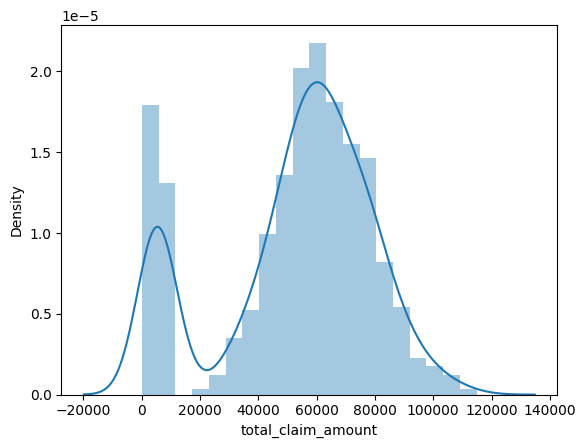

In [13]:
#Distribucion de la variable
sns.distplot(primas['total_claim_amount'])

#Mapa de correlacion
sns.heatmap(casas.corr())

In [14]:
primas.corr()

<ipython-input-14-02ecd52713f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  primas.corr()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


<ipython-input-15-9da07e808a85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(primas.corr())


<Axes: >

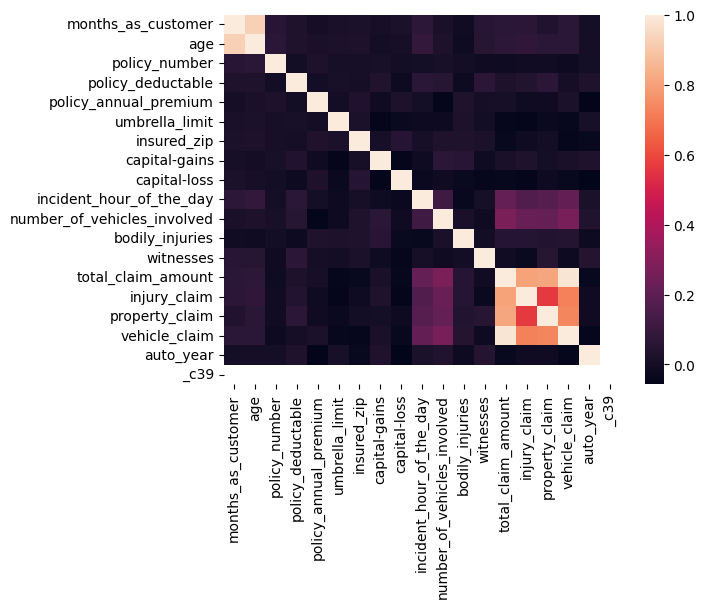

In [15]:
sns.heatmap(primas.corr())

# Machine Learning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
primas.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [18]:
primas.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [19]:
#Predictores
X = primas[['vehicle_claim','auto_year', 'policy_deductable', 'umbrella_limit', 'incident_hour_of_the_day', 'policy_annual_premium']]

In [20]:
X.head()
X

,vehicle_claim,auto_year,policy_deductable,umbrella_limit,incident_hour_of_the_day,policy_annual_premium
0,52080,2004,1000,0,5,1406.91
1,3510,2007,2000,5000000,8,1197.22
2,23100,2007,2000,5000000,7,1413.14
3,50720,2014,2000,6000000,5,1415.74
4,4550,2009,1000,6000000,20,1583.91
...,...,...,...,...,...,...
995,61040,2006,1000,0,20,1310.80
996,72320,2015,1000,0,23,1436.79
997,52500,1996,500,3000000,4,1383.49
998,36540,1998,2000,5000000,2,1356.92


In [21]:
Y = primas[['total_claim_amount']]
Y

,total_claim_amount
0,71610
1,5070
2,34650
3,63400
4,6500
...,...
995,87200
996,108480
997,67500
998,46980


In [22]:
#Separacion entre muestras
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [23]:
X_train

,vehicle_claim,auto_year,policy_deductable,umbrella_limit,incident_hour_of_the_day,policy_annual_premium
541,8300,2013,1000,7000000,22,1325.44
440,44590,2006,2000,0,14,1175.70
482,46410,2004,500,0,8,951.46
422,63180,2012,500,0,21,1021.90
778,40320,2003,2000,0,0,1133.85
...,...,...,...,...,...,...
106,53200,2000,1000,0,6,1125.37
270,59710,2003,2000,0,6,1589.54
860,37450,1999,1000,0,13,1023.11
435,58720,1996,500,0,6,1075.41


In [24]:
Y_train

,total_claim_amount
541,10790
440,57330
482,59670
422,91260
778,60480
...,...
106,79800
270,85300
860,58850
435,73400


In [25]:
print(Y_test.shape)
print(Y_train.shape)

(300, 1)
(700, 1)


In [27]:
#Entrenar el modelo
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [28]:
#Predicciones
from sklearn import metrics

In [29]:
#Regresa un array
predicciones = lrm.predict(X_test)

In [30]:
Y_test.head()

,total_claim_amount
521,88110
737,52800
740,67600
660,62800
411,6820


In [31]:
predicciones

array([[ 78511.00558304],
       [ 58678.60096099],
       [ 65897.53462966],
       [ 61829.72348195],
       [  7379.87546241],
       [ 67260.99959094],
       [ 76665.44710026],
       [ 49901.23762916],
       [ 50295.83860939],
       [  4641.6266484 ],
       [  5718.11464287],
       [ 92818.28063401],
       [  6704.59755658],
       [ 47741.7216374 ],
       [ 82652.56386226],
       [  4469.72655181],
       [ 43371.74972477],
       [ 41860.87349139],
       [ 60575.70772638],
       [ 68703.86803154],
       [ 58626.36325932],
       [  6256.74301736],
       [ 44940.24352638],
       [  3632.82852028],
       [  6862.55244982],
       [ 80270.60602056],
       [ 51284.82497017],
       [ 74817.69575699],
       [ 62115.93572372],
       [ 47217.97824239],
       [ 36652.12071156],
       [ 67877.39977117],
       [ 34643.03461926],
       [ 73948.72752001],
       [ 48555.70775937],
       [ 57657.85334009],
       [ 84978.53071186],
       [  6770.24197883],
       [ 449

In [32]:
predicciones.shape

(300, 1)

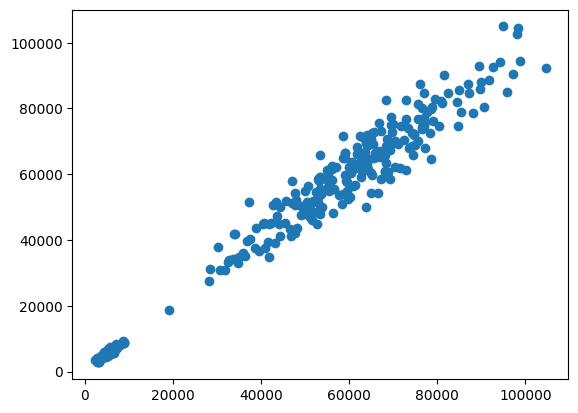

In [33]:
#Scatter de las predicciones
plt.scatter(Y_test, predicciones)

<ipython-input-34-cfb58a78aa05>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-predicciones)


<Axes: ylabel='Density'>

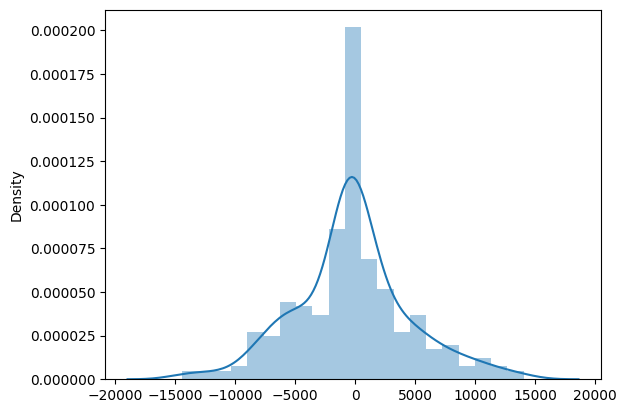

In [34]:
#Distribucipon de los errores
sns.distplot(Y_test-predicciones)

In [38]:
Y_test.describe()

,total_claim_amount
count,300.000000
mean,50046.500000
std,26742.858317
min,2250.000000
25%,34950.000000
50%,56280.000000
75%,68200.000000
max,104610.000000


In [46]:
X.head()

,vehicle_claim,auto_year,policy_deductable,umbrella_limit,incident_hour_of_the_day,policy_annual_premium
0,52080,2004,1000,0,5,1406.91
1,3510,2007,2000,5000000,8,1197.22
2,23100,2007,2000,5000000,7,1413.14
3,50720,2014,2000,6000000,5,1415.74
4,4550,2009,1000,6000000,20,1583.91


MAE (Mean absolute error)

In [35]:
metrics.mean_absolute_error(Y_test, predicciones)

3411.415337297019

MSE (Mean Square error)

In [ ]:
metrics.mean_squared_error(Y_test, predicciones)

22781111.144208677

RMSE (Root Mean Squere Error)

In [ ]:
np.sqrt(metrics.mean_squared_error(Y_test, predicciones))

4772.956226931971

## Coeficiente de Determinacion R2

In [39]:
lrm.score(X, Y)

0.9662652953576427

In [40]:
lrm.score(X_test, Y_test)

0.9680398122171214

In [41]:
lrm.score(X_train, Y_train)

0.9652512725950149

## Coeficientes.
No elimina las no significativas

In [42]:
X.columns

Index(['vehicle_claim', 'auto_year', 'policy_deductable', 'umbrella_limit',
       'incident_hour_of_the_day', 'policy_annual_premium'],
      dtype='object')

In [43]:
X.head()

,vehicle_claim,auto_year,policy_deductable,umbrella_limit,incident_hour_of_the_day,policy_annual_premium
0,52080,2004,1000,0,5,1406.91
1,3510,2007,2000,5000000,8,1197.22
2,23100,2007,2000,5000000,7,1413.14
3,50720,2014,2000,6000000,5,1415.74
4,4550,2009,1000,6000000,20,1583.91


In [44]:
lrm.coef_

array([[ 1.37625057e+00,  2.73136452e+01,  6.73783894e-01,
         5.24009932e-06,  1.13894676e+01, -5.25157485e-01]])

In [45]:
lrm.intercept_

array([-54365.61651991])

In [ ]:
print('Coefficients: \n', lrm.coef_)

Coefficients: 
 [[  1.37653356  27.22564945   0.67460642 252.19931996  10.8519132
   -0.54924205]]


In [ ]:
X_test.head()

,vehicle_claim,auto_year,policy_deductable,insured_sex,incident_hour_of_the_day,policy_annual_premium
521,56070,2003,2000,0,22,1137.02
737,42240,2006,1000,0,17,1422.78
740,47320,2007,1000,0,14,976.37
660,43960,2012,2000,1,10,1373.21
411,4960,2005,1000,0,6,1117.17


# Least Square con Statmodels

In [ ]:
pip install statsmodels

In [47]:
import numpy as np
import statsmodels.api as sm

In [48]:
X_sm=sm.add_constant(X_test)
X_sm.head()

,const,vehicle_claim,auto_year,policy_deductable,umbrella_limit,incident_hour_of_the_day,policy_annual_premium
521,1.0,56070,2003,2000,0,22,1137.02
737,1.0,42240,2006,1000,0,17,1422.78
740,1.0,47320,2007,1000,0,14,976.37
660,1.0,43960,2012,2000,0,10,1373.21
411,1.0,4960,2005,1000,0,6,1117.17


In [49]:
model = sm.OLS(Y_train, X_train)

In [50]:
lrm_results=model.fit()

In [51]:
print(lrm_results.summary())

                                 OLS Regression Results                                
Dep. Variable:     total_claim_amount   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.733e+04
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        02:50:41   Log-Likelihood:                         -6938.4
No. Observations:                 700   AIC:                                  1.389e+04
Df Residuals:                     694   BIC:                                  1.392e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [52]:
print(lrm_results.summary2())

                         Results: Ordinary least squares
Model:                  OLS                Adj. R-squared (uncentered): 0.993     
Dependent Variable:     total_claim_amount AIC:                         13888.7821
Date:                   2024-02-20 03:13   BIC:                         13916.0886
No. Observations:       700                Log-Likelihood:              -6938.4   
Df Model:               6                  F-statistic:                 1.733e+04 
Df Residuals:           694                Prob (F-statistic):          0.00      
R-squared (uncentered): 0.993              Scale:                       2.4027e+07
-----------------------------------------------------------------------------------
                              Coef.   Std.Err.     t      P>|t|    [0.025    0.975]
-----------------------------------------------------------------------------------
vehicle_claim                 1.3755    0.0102  135.3502  0.0000    1.3556   1.3955
auto_year                 

In [53]:
lrm_results.rsquared

0.9933695927750235

In [54]:
lrm_results.params

vehicle_claim                1.375544
auto_year                    0.231259
policy_deductable            0.672155
umbrella_limit               0.000006
incident_hour_of_the_day    12.164267
policy_annual_premium       -0.561600
dtype: float64

In [55]:
lrm_results.predict(X_test)

521    78563.338639
737    58646.799301
740    65849.005465
660    61628.966158
411     7404.110338
           ...     
468    53534.901082
935    65860.701606
428    72756.862272
7      45938.474221
155    51892.398333
Length: 300, dtype: float64